In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import plotly.express as px
import nbformat 
import datetime

In [8]:
"""
reading and filtering and cleaning the matches dataset.
    - dropping columns that i wont use
    - filtering by tournaments that i am interested
    - changing format of date columns
    - filtering by year
    - lower case to names


"""
#reading  
matches_2022 = pd.read_csv(r"\archive\atp_matches_till_2022.csv", delimiter = ",")
matches_2023 = pd.read_csv(r'\archive\atp_matches_2023.csv', delimiter = ',')
matches_2024 = pd.read_csv(r'\archive\atp_matches_2024.csv', delimiter = ',')


#concat the datasets
matches = pd.concat([matches_2022, matches_2023, matches_2024], ignore_index= True)

#dropping columns that i wont use
matches = matches.drop(['draw_size','winner_seed'], axis=1)

#removing the rows where tourney level is A (Other tour-level events) or D (davis cup)
# matches = matches[(matches.tourney_level != 'A') & 
#                   (matches.tourney_level != 'D') & 
#                   (matches.tourney_level != 'S') & 
#                   (matches.tourney_level != 'C')]

#making tourney_date to date type
matches['tourney_date'] = pd.to_datetime(matches['tourney_date'], format='%Y%m%d')



#filtering by tournaments after 2000
matches = matches[matches['tourney_date'].dt.year > 2000]

#dropping loser columns to focus on the winner stats
col_to_drop = [col for col in matches.columns if col.startswith('l') or col.startswith('loser')]
matches = matches.drop(col_to_drop, axis=1) 


# renaming the columns to drop the "winner" or "w"

matches.columns = matches.columns.str.replace(r'^(winner_|w_)', '', regex = True)

#replacing some columns names to make it understandable
matches.columns = matches.columns.str.replace('ht', 'height').str.replace('ioc', 'country').str.replace('df','double_faults')

#todos los nombres a lower case
matches['name'] = matches['name'].str.lower()

# writing the dataset
# matches.to_csv('matches.csv', index=False)

In [3]:
matches = pd.read_csv('matches.csv', delimiter= ',')

In [9]:
#funciones de analisis
"""
Creando funcion para devolver todos los analisi:
    - career high                          x
    - max_rank_points                      x
    - num of tournaments won               x 
    - mean of 1st serve won per surface    x
    - mean of aces per surface             x 
    - sum of aces per surface              x
    - 

"""
def career_high(df):
    max_rank = df.loc[df['rank'] == df['rank'].min()]
    month = max_rank['tourney_date'].dt.month_name().iloc[0]
    year = max_rank['tourney_date'].dt.year.iloc[0]
    
    return f'Career High Ranking:\nReached career high ranking number {max_rank["rank"].iloc[0]} on {month} of {year}.'

def max_rank_points(df):
    max_points = df.loc[df['rank_points'] == df['rank_points'].max()]
    month = max_points['tourney_date'].dt.month_name().iloc[0]
    year = max_points['tourney_date'].dt.year.iloc[0]

    return f'Max Rank Points:\nReached career high ranking points of {max_points["rank_points"].iloc[0]} on {month} of {year}.'


def num_tour_won(df, nombre):
    ganados = df[df['round'] == 'F'].loc[df['name'] == nombre, 'tourney_name']
    conteo_por_torneo = ganados.value_counts()
    total_torneos_ganados = sum(conteo_por_torneo)

    return f'Tournaments Won:\nWon {total_torneos_ganados} tournaments, corresponding to:\n{conteo_por_torneo.to_string()}.' 


def mean_svpt_surf(df):
    porcentaje = round(df.groupby('surface')['svpt'].mean(),2)

    return f'Percentage of won serves in different surfaces are:\n{porcentaje.to_string(header = False)}'


def aces(df):
    sum_aces = df.groupby('surface')['ace'].sum()
    mean_aces = round(df.groupby('surface')['ace'].mean(),2)

    return f'Aces Analysis:\nThe sum of aces in different surfaces are:\n{sum_aces.to_string(header = False)}\n\nThe mean of aces in different surfaces are:\n{mean_aces.to_string(header = False)}'

def double(df):
    sum_df = df.groupby('surface')['double_faults'].sum()
    mean_df = round(df.groupby('surface')['double_faults'].mean(),2)

    return f'Double fault Analysis:\nThe sum of double faults in different surfaces are:\n{sum_df.to_string(header = False)}\n\nThe mean of double faults in different surfaces are:\n{mean_df.to_string(header = False)}'

def create_rank_graph(df, nombre):
    fig = px.line(df, x='tourney_date', y='rank', title=f'Rank Progression for {nombre}')
    return fig

def analisis(df, nombre):
    df = df[df['name'].str.contains(nombre)]
    
    high = career_high(df)
    high_graph = create_rank_graph(df, nombre)
    rank = max_rank_points(df)
    tourn = num_tour_won(df, nombre)
    svpt = mean_svpt_surf(df)
    ace = aces(df)
    doublee = double(df)


    return f'{high}\n\n{rank}\n\n{tourn}\n\n{svpt}\n\n{ace}\n\n{doublee}'
    



In [14]:
print(analisis(matches, "daniil medvedev"))

Career High Ranking:
Reached career high ranking number 1.0 on March of 2022.

Max Rank Points:
Reached career high ranking points of 10620.0 on August of 2021.

Tournaments Won:
Won 21 tournaments, corresponding to:
tourney_name
Sydney                1
Us Open               1
Miami Masters         1
Dubai                 1
Doha                  1
Rotterdam             1
Vienna                1
Los Cabos             1
Mallorca              1
Atp Cup               1
Marseille             1
Winston-Salem         1
Canada Masters        1
Tour Finals           1
Paris Masters         1
Shanghai Masters      1
St. Petersburg        1
Cincinnati Masters    1
Sofia                 1
Tokyo                 1
Rome Masters          1.

Percentage of won serves in different surfaces are:
Clay     76.88
Grass    79.62
Hard     71.59

Aces Analysis:
The sum of aces in different surfaces are:
Clay      165.0
Grass     370.0
Hard     2392.0

The mean of aces in different surfaces are:
Clay     4.85
G

In [6]:
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 1.0, '10 top players')

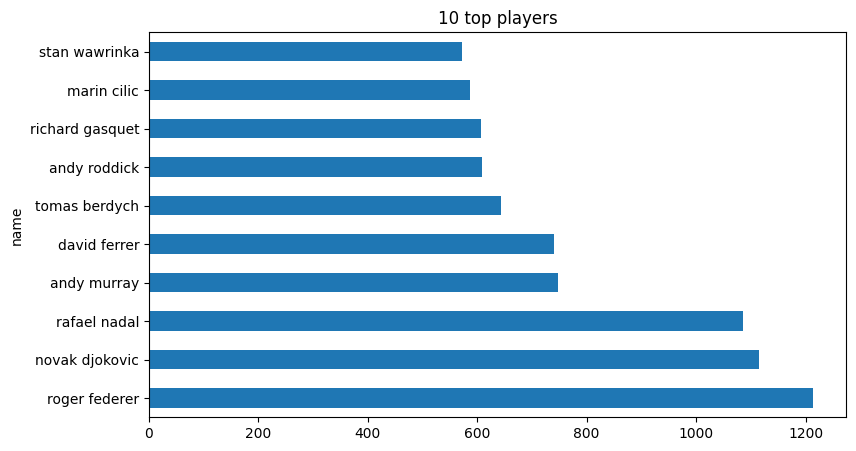

In [8]:
plt.figure(figsize=(9,5))
matches['name'].value_counts()[0:10].plot(kind='barh')
plt.title('10 top players')

In [9]:
#country with most wins?
winner = matches['country'].value_counts()
winner.head()

country
ESP    8384
FRA    6321
USA    6063
ARG    4478
GER    3747
Name: count, dtype: int64

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Wins')]

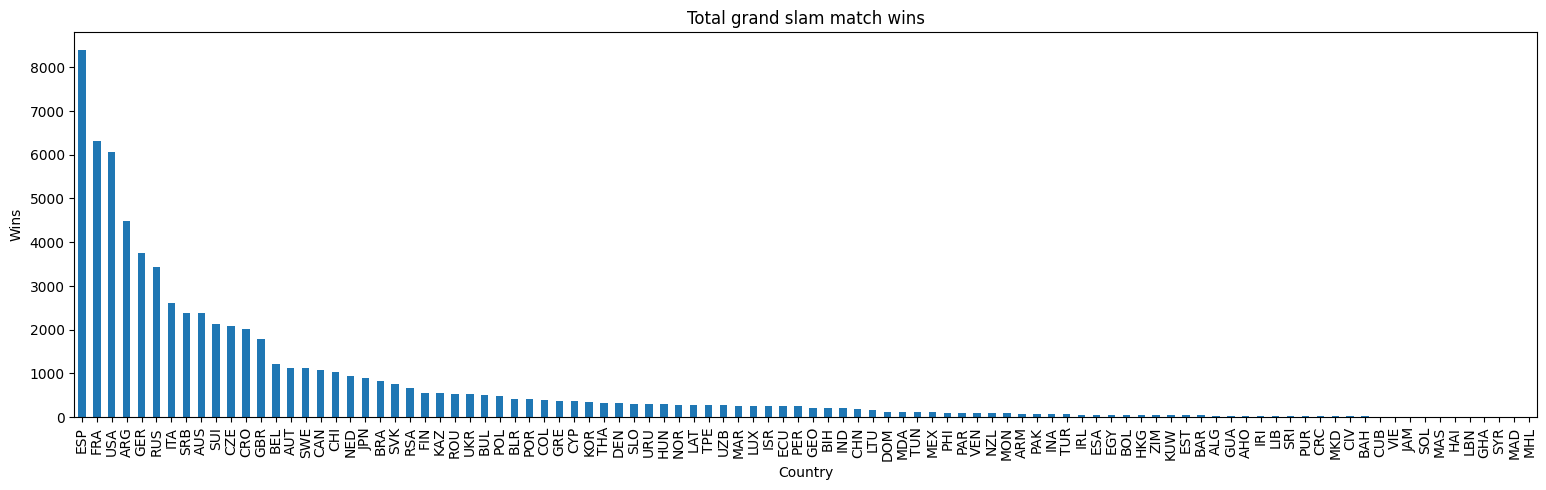

In [10]:
plt.figure(figsize=(200,5))

plt.subplot(1,9,1)
plt1 = matches['country'].value_counts()[:-10].plot(kind='bar')
plt.title('Total grand slam match wins')
plt1.set(xlabel='Country', ylabel = 'Wins')

In [11]:
#Principales jugadores de Esp

esp = matches[['country', 'tourney_level', "name"]]
esp = esp[(esp['tourney_level'] == 'G') & (esp['country'] == 'ESP')]
esp.head()

,country,tourney_level,name
2134,ESP,G,sergi bruguera
2140,ESP,G,tommy robredo
2146,ESP,G,juan carlos ferrero
2148,ESP,G,jacobo diaz
2156,ESP,G,alberto martin


In [12]:
esp_winner_name = esp['name'].value_counts()
esp_winner_name.head()

name
rafael nadal         315
david ferrer         146
fernando verdasco    113
tommy robredo        107
feliciano lopez       98
Name: count, dtype: int64

In [7]:
#grafico de distribucion de alturas
fig2 = px.histogram(matches, x = 'age')
fig2.show()

In [8]:
#jugador con mas ace
matches.loc[matches['ace'].idxmax()]

tourney_id                          2010-540
tourney_name                       Wimbledon
surface                                Grass
tourney_level                              G
tourney_date             2010-06-21 00:00:00
match_num                                 60
id                                    104545
entry                                    NaN
name                              john isner
hand                                       R
height                                 206.0
country                                  USA
age                                     25.1
score            6-4 3-6 6-7(7) 7-6(3) 70-68
best_of                                    5
round                                   R128
minutes                                665.0
ace                                    113.0
double_faults                           10.0
svpt                                   491.0
1stIn                                  361.0
1stWon                                 292.0
2ndWon    

In [9]:
#menores de 25 anos
menores = matches[matches['age'] < 25]


In [59]:
#jugador con mas porcentaje de primeros servicios ganados
matches.loc[matches['1stWon'].idxmax()]

tourney_id                          2010-540
tourney_name                       Wimbledon
surface                                Grass
tourney_level                              G
tourney_date             2010-06-21 00:00:00
match_num                                 60
id                                    104545
entry                                    NaN
name                              John Isner
hand                                       R
height                                 206.0
country                                  USA
age                                     25.1
score            6-4 3-6 6-7(7) 7-6(3) 70-68
best_of                                    5
round                                   R128
minutes                                665.0
ace                                    113.0
double_faults                           10.0
svpt                                   491.0
1stIn                                  361.0
1stWon                                 292.0
2ndWon    

In [63]:
#partidos jugados en clay
matches[matches['surface'] == 'Clay'] 

,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,id,entry,name,hand,height,country,age,score,best_of,round,minutes,ace,double_faults,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,rank,rank_points
123787,2001-410,Monte Carlo Masters,Clay,M,2001-04-16,1,103324,NaN,Arnaud Di Pasquale,R,185.0,FRA,22.1,6-3 6-1,3,R64,52.0,0.0,1.0,43.0,32.0,24.0,6.0,8.0,0.0,1.0,67.0,615.0
123788,2001-410,Monte Carlo Masters,Clay,M,2001-04-16,2,102231,NaN,Alex Calatrava,R,190.0,ESP,27.8,2-6 7-5 6-3,3,R64,113.0,2.0,2.0,93.0,50.0,33.0,21.0,15.0,8.0,13.0,52.0,740.0
123789,2001-410,Monte Carlo Masters,Clay,M,2001-04-16,3,102106,NaN,Davide Sanguinetti,R,188.0,ITA,28.6,7-6(2) 6-7(2) 6-4,3,R64,158.0,5.0,2.0,103.0,56.0,33.0,30.0,17.0,2.0,6.0,55.0,714.0
123790,2001-410,Monte Carlo Masters,Clay,M,2001-04-16,4,103819,NaN,Roger Federer,R,185.0,SUI,19.6,6-4 6-3,3,R64,85.0,7.0,2.0,78.0,49.0,33.0,11.0,10.0,10.0,13.0,22.0,1290.0
123791,2001-410,Monte Carlo Masters,Clay,M,2001-04-16,5,103206,NaN,Sebastien Grosjean,R,175.0,FRA,22.8,6-4 7-5,3,R64,91.0,2.0,0.0,65.0,38.0,25.0,19.0,11.0,3.0,4.0,15.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186613,2022-520,Roland Garros,Clay,G,2022-05-23,222,134770,NaN,Casper Ruud,R,183.0,NOR,23.4,6-1 4-6 7-6(2) 6-3,5,QF,NaN,13.0,4.0,118.0,82.0,64.0,18.0,20.0,3.0,6.0,8.0,3940.0
186614,2022-520,Roland Garros,Clay,G,2022-05-23,223,105227,NaN,Marin Cilic,R,198.0,CRO,33.6,5-7 6-3 6-4 3-6 7-6(2),5,QF,NaN,33.0,2.0,186.0,111.0,81.0,42.0,26.0,6.0,8.0,23.0,1695.0
186615,2022-520,Roland Garros,Clay,G,2022-05-23,224,104745,NaN,Rafael Nadal,L,185.0,ESP,35.9,7-6(8) 6-6 RET,5,SF,187.0,3.0,1.0,87.0,52.0,30.0,17.0,12.0,3.0,8.0,5.0,5525.0
186616,2022-520,Roland Garros,Clay,G,2022-05-23,225,134770,NaN,Casper Ruud,R,183.0,NOR,23.4,3-6 6-4 6-2 6-2,5,SF,NaN,16.0,0.0,109.0,70.0,50.0,25.0,18.0,7.0,9.0,8.0,3940.0


In [68]:
#rear un gráfico de barras que muestre el número de partidos jugados en cada nivel de torneo.
fig3 = px.bar(matches, x= 'tourney_level', color='surface')
fig3.show()

In [73]:
#relacion entre altura y numero de aces
fig4 = px.scatter(matches, x = 'height', y = 'ace')
fig4.show()

In [84]:
#partidos ganados por pais
matches.groupby('country').size().sort_values(ascending= False).head()

country
ESP    3371
FRA    2328
USA    2216
ARG    1473
RUS    1189
dtype: int64